# Causal profit

##### Datasets

1. Hillstrom
2. Bank
3. Criteo
4. Synthetic

##### Treatment effects estimation methods

1. Causal Forest (CF)
2. T_learner
3. S_learner

##### Supervised learning methods

1. Logistic regression (LR)
2. XGBoost (XGB)

In [1]:
from src.methods._init_ import *
root = os.getcwd()

### 1. Load data

In [2]:
'''
load_data
> Parameters: name_dataset, path datasets
> Returns: dictionary containing: 
    1. 'name': Name dataset
    2. 'folds': Folds for training
    3. 'T': Name treatment
    4. 'X': Names features
    5. 'Y': Name target
    6. 'descriptive': Descriptives
'''
path_datasets = root + 'datasets/' 
data = load_data('Synthetic',path_datasets)

### 2. Train causal model

1. Train causal models: 'load_model' = False
2. Load pretrained causal models: 'load_model' = True

In [3]:
'''
train_causal
> Parameters: 
    1. Path to directory where models are saved
    2. Name of dataset
    3. Folds
    4. Name treatment
    5. Name target
    6. Name features
    7. Algorithm 
    8. Load_model == True if model was saved
> Returns: list of dfs with predictions
'''
path_models = root + '/models/'
effect_estimates = train_causal(path_models, data['name'],data['folds'],data['T'],data['Y'],data['X'],'XGB',True)

### 3. Performance metrics

In [4]:
"""
Specify the b and c parameters:
"""
#b = [10,100,200]
b = [100]
#benefit = 10
#c_pro = [0.2,0.3,0.4]
c = 0.1

'''
performance_metrics
> Parameters: 
    1. Predictions: effect_estimates
    2. Name of causal model: [CF,T_learner,S_learner]
    3. Name treatment
    4. Name target
    5. Benefit parameters: b
    6. Cost parameters: c
> Returns: list of performance metrics and data for plots
'''

performance = performance_metrics(effect_estimates,'T_learner',data['T'],data['Y'],b,c)
performance

{'Qini_in': [0.3119623455520935],
 'Qini_sen': [0.2982323803555406],
 'Prof_in': [0.25462573335840655],
 'Prof_se': [0.5808609087618989],
 'MP_in_val': [5.165928351928352],
 'MP_sen_val': [5.231948371948372],
 'MP_in_index': [8],
 'MP_sen_index': [9],
 'plot_qinis':          x          Approach      Value
 0     0.00  Profit-sensitive   0.000000
 1     0.01  Profit-sensitive  11.000000
 2     0.02  Profit-sensitive  19.000000
 3     0.03  Profit-sensitive  23.333333
 4     0.04  Profit-sensitive  34.222222
 ...    ...               ...        ...
 1005  0.96            Random  72.288000
 1006  0.97            Random  73.041000
 1007  0.98            Random  73.794000
 1008  0.99            Random  74.547000
 1009  1.00            Random  75.300000
 
 [2020 rows x 3 columns],
 'plot_profit':         x            Approach     Value
 0    0.00    Profit-sensitive  0.000000
 1    0.01    Profit-sensitive  0.990991
 2    0.02    Profit-sensitive  1.711712
 3    0.03    Profit-sensitive  2.0

### 4. Plots
#### Qini

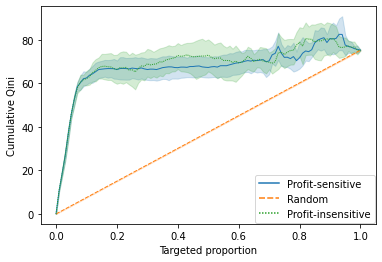

In [5]:
ax = sns.lineplot(x='x', y= 'Value', hue='Approach', style = 'Approach',lw=1,data = performance['plot_qinis'])
plt.xlabel("Targeted proportion")
plt.ylabel("Cumulative Qini")
#plt.xticks(np.linspace(0, 100, 11, endpoint = True))
#ax.legend(loc = 4, frameon = False, ncol = 1, labelspacing= 0.2)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=4, borderaxespad=0.1)
#fig_uplift = ax.get_figure()
#fig_uplift.savefig('Qini_Hillstrom.pdf',bbox_inches='tight',transparent =True)

#### Profit

Text(0, 0.5, 'Profit per instance')

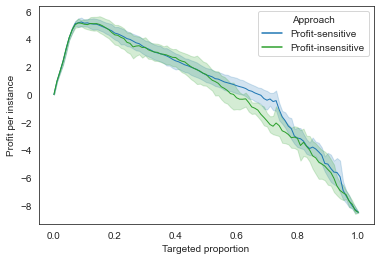

In [6]:
sns.set_style("white")
flatui = ["#1f77b4", "#2ca02c"]
ax = sns.lineplot(x='x', y= 'Value', hue='Approach', palette=flatui,lw=1,data = performance['plot_profit'])
plt.xlabel("Targeted proportion")
plt.ylabel("Profit per instance")
#plt.xticks(np.linspace(0, 100, 11, endpoint = True))
#ax.legend(loc = 4, frameon = False, ncol = 1, labelspacing= 0.2)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc=2, borderaxespad=0.1)#loc = 4
#fig_uplift = ax.get_figure()
#fig_uplift.savefig('b10_CF_Criteo.pdf',bbox_inches='tight',transparent =True)

#### Cumulative positive instances in T and C

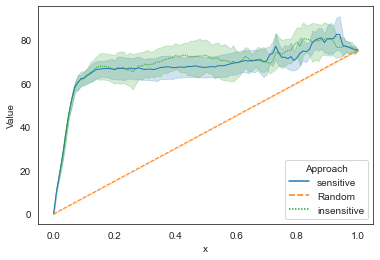

In [7]:
sns.set_style("white")
ax = sns.lineplot(x='x', y= 'Value', hue='Approach', style = 'Approach',lw=1,data = performance['plot_cum_t'])